# Dual Information Points Method

In [233]:
mutable struct Var
    #particle
    pxₚ::Array{Float64,2}
    pyₚ::Array{Float64,2}
    Uₚ ::Array{Float64,2}
    Nxₚ::Array{Int32,2}
    Nyₚ::Array{Int32,2}
    
    px ::Array{Float64,2}
    py ::Array{Float64,2}
    U ::Array{Float64,2}
    
    Mrk::Array{Int32,2}
end

In [294]:
function DIP(pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,u,v,U,dt,dx,dy)
    I,J = size(U)
    Uᵢ = U
    Mrk = zeros(Int,I,J)
    uₚ,vₚ = speed(u,v,pxₚ,pyₚ,Nxₚ,Nyₚ,dx,dy)
    uc,vc = speed(u,v,px,py,dx,dy)
 #   @show uₚ
    renew_particle(pxₚ,pyₚ,Nxₚ,Nyₚ,uₚ,vₚ,dt,dx,dy)
    renew_cell(px,py,uc,vc,U,Mrk,dx,dy,dt)
    correct_by_particle(pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,U,Mrk)
    bound!(px,py,U,Mrk)
    blank(px,py,U,Uᵢ,uc,vc,Mrk,dx,dy,dt)
    for i =1:2
    smooth(px, py, U)
    end
end

DIP (generic function with 2 methods)

In [235]:
function solve(T)
    pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,u,v,U,dx,dy= init()
    
    t = 0
    dt = 0.3*dx
    while t ≤ T
        if t+dt > T
            dt = T-t+1e-10
        end
        t += dt
        print("$t \n")
     DIP(pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,u,v,U,dt,dx,dy)
    end
    return px,py,U
end

solve (generic function with 1 method)

In [295]:
px,py,U= solve(π)
           

0.00471238898038469 
0.00942477796076938 
0.01413716694115407 
0.01884955592153876 
0.023561944901923447 
0.028274333882308135 
0.03298672286269282 
0.03769911184307751 
0.0424115008234622 
0.04712388980384689 
0.051836278784231575 
0.05654866776461626 
0.06126105674500095 
0.06597344572538565 
0.07068583470577033 
0.07539822368615502 
0.08011061266653971 
0.0848230016469244 
0.08953539062730909 
0.09424777960769377 
0.09896016858807846 
0.10367255756846315 
0.10838494654884784 
0.11309733552923253 
0.11780972450961721 
0.1225221134900019 
0.1272345024703866 
0.1319468914507713 
0.136659280431156 
0.1413716694115407 
0.1460840583919254 
0.1507964473723101 
0.1555088363526948 
0.1602212253330795 
0.1649336143134642 
0.1696460032938489 
0.1743583922742336 
0.1790707812546183 
0.183783170235003 
0.18849555921538771 
0.19320794819577242 
0.19792033717615712 
0.20263272615654182 
0.20734511513692652 
0.21205750411731122 
0.21676989309769593 
0.22148228207808063 
0.22619467105846533 
0.23090

1.9650662048204048 
1.9697785938007895 
1.974490982781174 
1.9792033717615587 
1.9839157607419433 
1.988628149722328 
1.9933405387027125 
1.9980529276830972 
2.002765316663482 
2.0074777056438666 
2.0121900946242515 
2.0169024836046363 
2.021614872585021 
2.026327261565406 
2.031039650545791 
2.0357520395261757 
2.0404644285065605 
2.0451768174869454 
2.04988920646733 
2.054601595447715 
2.0593139844281 
2.0640263734084847 
2.0687387623888696 
2.0734511513692544 
2.0781635403496392 
2.082875929330024 
2.087588318310409 
2.0923007072907938 
2.0970130962711786 
2.1017254852515634 
2.1064378742319483 
2.111150263212333 
2.115862652192718 
2.120575041173103 
2.1252874301534876 
2.1299998191338725 
2.1347122081142573 
2.139424597094642 
2.144136986075027 
2.148849375055412 
2.1535617640357967 
2.1582741530161815 
2.1629865419965664 
2.167698930976951 
2.172411319957336 
2.177123708937721 
2.1818360979181057 
2.1865484868984906 
2.1912608758788754 
2.1959732648592603 
2.200685653839645 
2.20

([0.0 0.0 … 0.0 0.0; 0.0 0.0917056 … 0.499733 0.0; … ; 0.0 -0.497774 … 0.000646524 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.497243 … -0.194832 0.0; … ; 0.0 -0.00115497 … -0.498107 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [286]:
X = copy(U)
Y = copy(U)
I,J = size(U)
for i in 1:I
    for j in 1:J
X[i, j] = i +  px[i,j]
Y[i, j] = j +  py[i,j]
    end
end



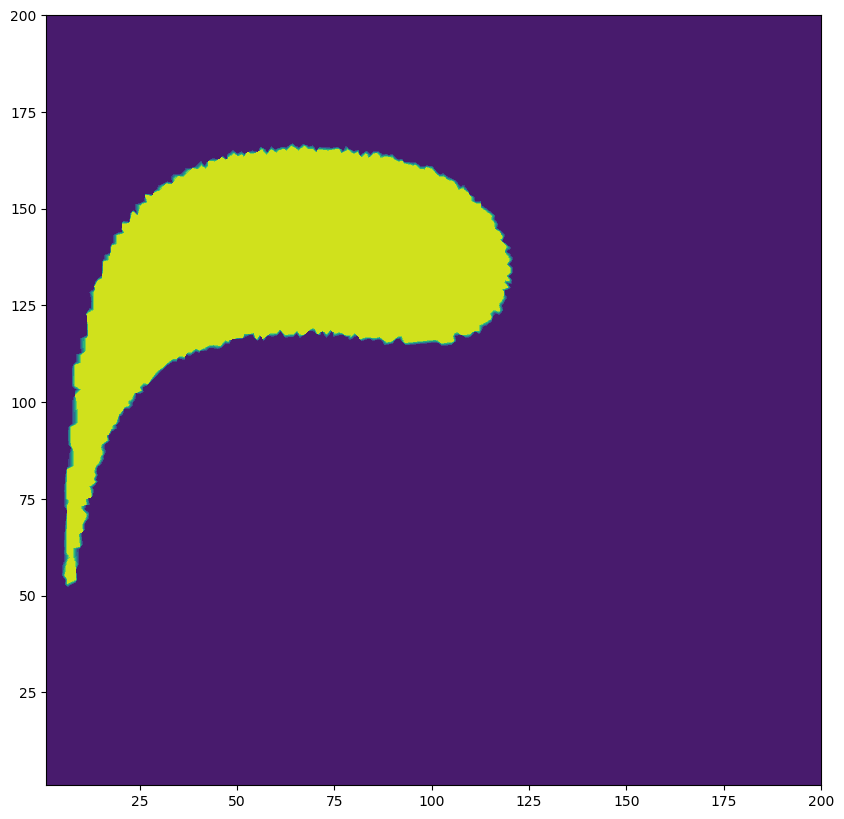

PyObject <matplotlib.contour.QuadContourSet object at 0x7f42025759e8>

In [296]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.contourf(X,Y,U)

In [297]:
using  DelimitedFiles
Output(px, py, U)

In [277]:
function Output(px,py,U)
   I,J = size(U)
    io = open("data.dat", "w+")
    
    A =zeros(Float64,I*J,3)
    text = " TITLE = \"Dataset\"
VARIABLES = \"x\" \"y\" \"u\"  ZONE T=\"Zone 1\" 
I=$I,J=$J,K=1,ZONETYPE=Ordered 
DATAPACKING=POINT \n "

    write(io,text) 

    for i in 1:I; for j in 1:J
        k = i +J*(j-1)
        A[k,1] = i +px[i,j]
        A[k,2] = j +py[i,j]    
        A[k,3] = U[i,j]     
            end;end
    # write(io,A)  
      writedlm(io, A, "  ")
    close(io)
end

Output (generic function with 1 method)

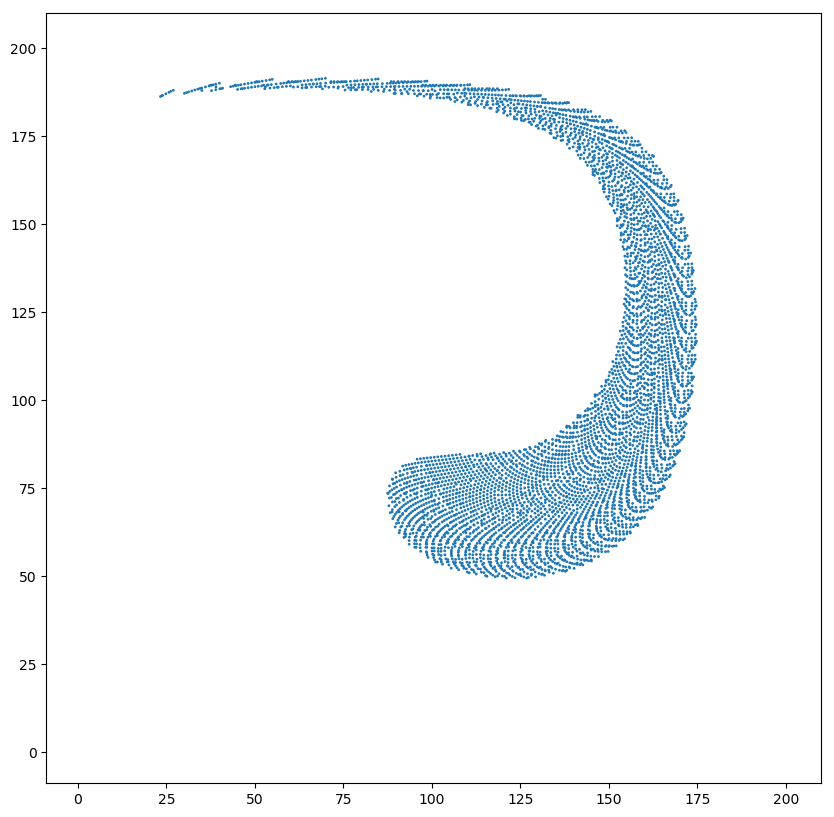

PyObject <matplotlib.collections.PathCollection object at 0x7f42039720b8>

In [241]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.scatter(X,Y,U)

In [290]:
function init()
    I = 200
    J = 200
    dx = π/I
    dy = π/J
    r = π/5
    
    xc = π/2
    yc = 0.7
    
    pxₚ=zeros(Float64,I,J)
    pyₚ=zeros(Float64,I,J)
    Nxₚ=zeros(Int32,I,J)
    Nyₚ=zeros(Int32,I,J)
    U = zeros(Float64,I,J)
    Uₚ = zeros(Float64,I,J)
    u = zeros(Float64,I,J)
    v = zeros(Float64,I,J)
    
    px = zeros(Float64,I,J)
    py = zeros(Float64,I,J)
    for j in 1:J
        for i in 1:I
            Nxₚ[i,j]=i
            Nyₚ[i,j]=j
        end
    end
    for j in 1:J
        for i in 1:I
            d= distance(dx*i,dy*j,xc,yc)
            if d < r
                U[i,j] = 1
                Uₚ[i,j] = 1
            end
        end
    end
 #   Uₚ = copy(U)
    return pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,u,v,U,dx,dy
end
    
    
    

init (generic function with 1 method)

In [243]:
function distance(x1,y1,x2,y2)
    return √((x1-x2)^2+(y1-y2)^2)
end

distance (generic function with 1 method)

In [244]:
function speed(u,v,pxₚ,pyₚ,Nxₚ,Nyₚ,dx,dy)
    I,J = size(u)
    uₚ = ones(Float64,I,J)
    vₚ = ones(Float64,I,J)
  #  return uₚ,vₚ
    for j in 1:J
        for i in 1:I
            x = Nxₚ[i,j]*dx +pxₚ[i,j]*dx
            y=  Nyₚ[i,j]*dy +pyₚ[i,j]*dy
            uₚ[i,j] = cos(x-π/2)*sin(y-π/2)
            vₚ[i,j] = -sin(x-π/2)*cos(y-π/2)
        end
    end
    return uₚ,vₚ
end
    

speed (generic function with 2 methods)

In [245]:
function speed(u,v,pxₚ,pyₚ,dx,dy)
    I,J = size(u)
    uₚ = ones(Float64,I,J)
    vₚ = ones(Float64,I,J)
  #  return uₚ,vₚ
    for j in 1:J
        for i in 1:I
            x = i*dx +pxₚ[i,j]*dx
            y =  j*dy +pyₚ[i,j]*dy
            uₚ[i,j] = cos(x-π/2)*sin(y-π/2)
            vₚ[i,j] = -sin(x-π/2)*cos(y-π/2)
        end
    end
    return uₚ,vₚ
end
    

speed (generic function with 2 methods)

In [246]:
uc

200×200 Array{Float64,2}:
 -0.454649    0.350175    0.83305    …   0.838802    0.396859   -0.409954 
 -0.491295    0.378401    0.900198       0.906414    0.428848   -0.442998 
 -0.0762475   0.0587266   0.139708       0.140672    0.0665558  -0.0687519
  0.408902   -0.314941   -0.749229      -0.754402   -0.356928    0.368705 
  0.518109   -0.399053   -0.949328      -0.955883   -0.452253    0.467176 
  0.150969   -0.116278   -0.276619   …  -0.278529   -0.13178     0.136128 
 -0.354971    0.273403    0.650412       0.654903    0.309852   -0.320076 
 -0.534553    0.411718    0.979457       0.986221    0.466607   -0.482003 
 -0.222669    0.171502    0.407994       0.410811    0.194366   -0.200779 
  0.293936   -0.226393   -0.538577      -0.542296   -0.256574    0.26504  
  0.540297   -0.416143   -0.989983   …  -0.996819   -0.471621    0.487183 
  0.289912   -0.223293   -0.531203      -0.534871   -0.253062    0.261412 
 -0.227017    0.174851    0.415962       0.418835    0.198162   -0.2047   

In [291]:
function blank(px,py,U,Uᵢ,uc,vc,Mrk,dx,dy,dt)
    I,J = size(U)
    for i in 1:I
        for j in 1:J
            if Mrk[i,j] == 0
                q = -uc[i,j]*dt/dx
                ix = i+ifloor(q+0.5)
                q = -vc[i,j]*dt/dy
                iy = j + ifloor(q+0.5)
                U[i,j] =  Uᵢ[ix,iy]
            end
        end
    end
end

blank (generic function with 1 method)

In [248]:
function interface_line(px,py,U)

LoadError: syntax: incomplete: premature end of input

In [249]:
function smooth(px,py,U)
    I,J = size(U)
    for j in 2:J-1;for i in 2:I-1 
        n = 0
       if U[i+1,j] == U[i,j] && (U[i+1,j+1]== U[i,j] || U[i+1,j-1]== U[i,j])
           n += 1
        end
       if U[i-1,j] == U[i,j] && (U[i-1,j-1]== U[i,j] || U[i-1,j+1]== U[i,j])
           n += 1
        end
       if U[i,j-1] == U[i,j] && (U[i+1,j-1]== U[i,j] || U[i-1,j-1]== U[i,j])
           n += 1
        end
        if U[i,j+1] == U[i,j] && (U[i+1,j+1]== U[i,j] || U[i-1,j+1]== U[i,j])
           n += 1
        end
        
        if n == 0  
            if U[i,j] == 1
                U[i,j] =0
                px[i,j]=0
                py[i,j]=0
            else
                U[i,j] =1
                px[i,j]=0
                py[i,j]=0
            end
        end
    end;end
end            
            

smooth (generic function with 1 method)

In [250]:
function bound!(px,py,U,Mrk)
    I,J = size(U)
    for i in 1:I
       for  j = [1,J] 
        Mrk[i,j] = 1
        U[i,j] = 0
        px[i,j] =0
        py[i,j] = 0
        end
    end
    for j in 1:J
       for  i = [1,I] 
        Mrk[i,j] = 1
        U[i,j] = 0
        px[i,j] =0
        py[i,j] = 0
        end
    end
end


bound! (generic function with 1 method)

In [251]:
function correct_by_particle(pxₚ,pyₚ,Nxₚ,Nyₚ,Uₚ,px,py,U,Mrk)
    I,J = size(Uₚ)
    Mrk₀ = zeros(Int,I,J)
    for i in 1:I
        for j in 1:J
            ix = Nxₚ[i,j];iy = Nyₚ[i,j]
            if 1≤ix ≤I && 1≤iy ≤ J 
                if Mrk₀[ix,iy] == 1
                    if U[ix,iy] == Uₚ[i,j]
                        px[ix,iy] = 1/2*(px[ix,iy]+pxₚ[i,j])
                        py[ix,iy] = 1/2*(py[ix,iy]+pyₚ[i,j])
                    elseif U[ix,iy] < Uₚ[i,j]
                        px[ix,iy] = pxₚ[i,j]
                        py[ix,iy] = pyₚ[i,j]
                        U[ix,iy] = Uₚ[i,j]
                    end
                elseif Mrk₀[ix,iy] ==0
                    px[ix,iy] = pxₚ[i,j]
                    py[ix,iy] = pyₚ[i,j]
                    U[ix,iy] = Uₚ[i,j]
                    Mrk₀[ix,iy] = 1
                    Mrk[ix,iy] =1
                end
            end
        end
    end
   # return px,py,U
end

correct_by_particle (generic function with 1 method)

In [252]:
function renew_cell(px,py,uc,vc,U,Mrk,dx,dy,dt)
    I,J = size(U)
    Uᵢ = copy(U)
    pxᵢ = copy(px)
    pyᵢ = copy(py)
    for i in 1:I
        for j in 1:J
            q = px[i,j] + uc[i,j]*dt/dx
            ix = i+ifloor(q+0.5)
            q1= py[i,j] +vc[i,j]*dt/dy
            iy = j+ifloor(q1+0.5)
            
            if  1≤ix ≤I && 1≤iy ≤ J 
                if Mrk[ix,iy] == 1 
                    if Uᵢ[ix,iy] == U[i,j]
                        pxᵢ[ix,iy] = 1/2*(pxᵢ[ix,iy] + q-floor(q+0.5))
                        pyᵢ[ix,iy] = 1/2*(pyᵢ[ix,iy] + q1-floor(q1+0.5))
                    elseif Uᵢ[ix,iy] < U[i,j]
                        Uᵢ[ix,iy] = U[i,j]
                        pxᵢ[ix,iy] =  q-ifloor(q+0.5)
                        pyᵢ[ix,iy] = q1 -ifloor(q+0.5)
                    end
                elseif Mrk[ix,iy] == 0 
                    Uᵢ[ix,iy] = U[i,j]
                    pxᵢ[ix,iy] =  q-ifloor(q+0.5)
                    pyᵢ[ix,iy] = q1 -ifloor(q+0.5)
                    Mrk[ix,iy] = 1
                end
            end
                    
        end
    end
    px = pxᵢ
    py = pyᵢ
    U = Uᵢ
end

renew_cell (generic function with 3 methods)

In [116]:
function renew_particle(pxₚ,pyₚ,Nxₚ,Nyₚ,uₚ,vₚ,dt,dx,dy)
    I,J = size(uₚ)
    for i in 1:I
        for j in 1:J
            q = pxₚ[i,j] + uₚ[i,j]*dt/dx
            Nxₚ[i,j] += ifloor(q+0.5)
            pxₚ[i,j] = q-ifloor(q+0.5)
            
            q = pyₚ[i,j]+vₚ[i,j]*dt/dy
            Nyₚ[i,j] += ifloor(q+0.5)
            pyₚ[i,j] = q-ifloor(q+0.5)
        end
    end
 #   return pxₚ,pyₚ,Nxₚ,Nyₚ
end

renew_particle (generic function with 1 method)

In [39]:
ifloor(x) = Int(floor(x))
    

ifloor (generic function with 1 method)

In [40]:
ifloor(3.2)

3